# CZ4042 Neural Networks & Deep Learning
## Assignment - 1: Part A, Question 1

> Gupta Jay  
> U1822549K  
> School of Computer Science and Engineering  
> Nanyang Technological University, Singapore  

## Imports

In [13]:
# Setting the seed here is sufficient. 
# If you don't plan to use these starter code, make sure you add this cell.

SEED = 42

import os
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

import random 
random.seed(SEED)

import numpy as np
np.random.seed(SEED)

import tensorflow as tf
tf.random.set_seed(SEED)

In [14]:
import pandas as pd
import numpy as np

# tensorflow libraries
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential

# sklearn libraries are useful for preprocessing, performance measures, etc.
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

In [15]:
print(tf.__version__)

2.6.0


In [16]:
# Supress any warnings for clean presentation
import warnings
warnings.filterwarnings("ignore")

In [17]:
df = pd.read_csv('./features_30_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [18]:
df['label'].value_counts()

blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: label, dtype: int64

Split and scale dataset

In [19]:
columns_to_drop = ['label','filename', 'length']

def prepare_dataset(df, columns_to_drop, test_size, random_state):

    # Encode the labels from 0 to n_classes-1  
    label_encoder = preprocessing.LabelEncoder()
    df['label'] = label_encoder.fit_transform(df['label'])
  
    # devide data to train and test
    df_train, df_test = train_test_split(df, test_size=test_size, random_state=random_state)
    
    # scale the training inputs
    x_train = df_train.drop(columns_to_drop,axis=1)
    y_train = df_train['label'].to_numpy()
    
    standard_scaler = preprocessing.StandardScaler()
    x_train_scaled = standard_scaler.fit_transform(x_train)

    #scale and prepare testing data
    x_test = df_test.drop(columns_to_drop,axis=1)
    x_test_scaled = standard_scaler.transform(x_test)
    y_test = df_test['label'].to_numpy() 
  
    return x_train_scaled, y_train, x_test_scaled, y_test

In [20]:
X_train, y_train, X_test, y_test = prepare_dataset(df, columns_to_drop, test_size=0.3, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(700, 57) (700,)
(300, 57) (300,)


## Part A: Feedforward Deep Neural Network

* **Loss Function**: Sparse Categorial Crossentropy
* **Epochs**: 50
* **Batch Size**: 1 

In [21]:
def getModel(first_layer_activation, second_layer_activation):
    # Inputs -> Dense -> Dropout -> Dense (Output)
    model = keras.Sequential()
    model.add(layers.Dense(16, activation=first_layer_activation, input_dim=X_train.shape[1]))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(df['label'].nunique(), activation=second_layer_activation))
    return model

def getOptimizer():
    # Adam Optimizer (Default Parameters) -> Stochastic Gradient Descent
    optimizer = keras.optimizers.Adam()
    return optimizer

In [22]:
loss = "sparse_categorical_crossentropy"
metrics = ["accuracy"]
optimizer = getOptimizer()

model = getModel("relu", "softmax")
model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

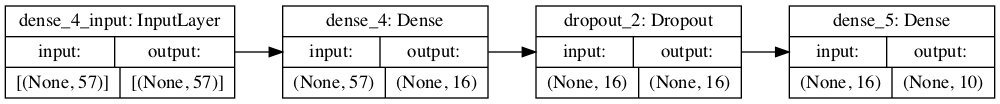

In [23]:
keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [24]:
epochs = 50
verbose = 1
batch_size = 1

history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=verbose, batch_size=batch_size)

2021-10-13 15:37:18.719410: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
700/700 [==============================] - 1s 1ms/step - loss: 2.1805 - accuracy: 0.2129 - val_loss: 1.7609 - val_accuracy: 0.3633
Epoch 2/50
700/700 [==============================] - 0s 706us/step - loss: 1.6788 - accuracy: 0.3843 - val_loss: 1.5471 - val_accuracy: 0.4300
Epoch 3/50
700/700 [==============================] - 1s 716us/step - loss: 1.5199 - accuracy: 0.4357 - val_loss: 1.4200 - val_accuracy: 0.4700
Epoch 4/50
700/700 [==============================] - 1s 774us/step - loss: 1.3646 - accuracy: 0.5286 - val_loss: 1.3311 - val_accuracy: 0.5333
Epoch 5/50
700/700 [==============================] - 1s 806us/step - loss: 1.2762 - accuracy: 0.5529 - val_loss: 1.2641 - val_accuracy: 0.5800
Epoch 6/50
700/700 [==============================] - 1s 916us/step - loss: 1.2104 - accuracy: 0.5614 - val_loss: 1.2330 - val_accuracy: 0.5833
Epoch 7/50
700/700 [==============================] - 1s 859us/step - loss: 1.1341 - accuracy: 0.5957 - val_loss: 1.1765 - val_accuracy: 0

## Part B: Plotting Accuracy agaist Training Epochs

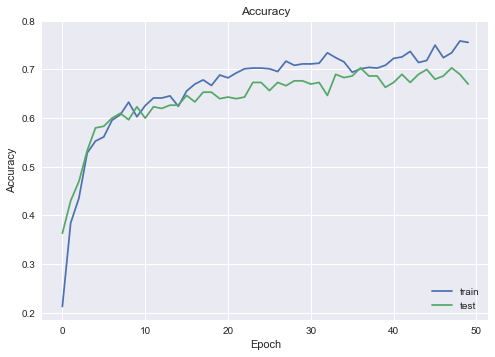

In [25]:
plt.style.use("seaborn")

# Extracting Train & Test Accuracy from model history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plotting
plt.plot(accuracy)
plt.plot(val_accuracy)

# Labelling
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.yticks(np.arange(0.2, 0.9, 0.1))

plt.show()

From the plot shown above, we observe that after 50 epochs, the `train accuracy` remains in the range of about <70% to 75%>, and the `test accuracy` remains lower in the range of about <65% to 70%>. As the `test accuracy` is a bit lower to `train accuracy`, the model is slightly overfitting. The `test accuracy` does not increase/decrease significantly after `30` epochs, therefore, it converges.

## Part C: Plotting Loss agaist Training Epochs

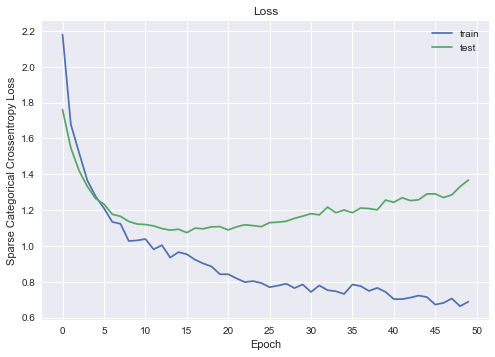

In [26]:
plt.style.use("seaborn")

# Extracting Train & Test Loss from model history
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting
plt.plot(loss)
plt.plot(val_loss)

# Labelling
plt.title('Loss')
plt.ylabel('Sparse Categorical Crossentropy Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.xticks(np.arange(0, 50+1, 5.0))

plt.show()

From the graph above, we observe that the `test sparse crossentropy loss` (green line) begins to converge at around `20` epochs. Since the `test` loss keeps increasing and `train` loss keeps decreasing after the 25th epoch, the model is overfitting.

Overfitting is one of the problems that occur during training of neural networks, which drives the training error of the network to a very small value at the expense of the test error. The network learns to respond correctly to the training inputs by remembering them too much but is unable to generalize to produce correct outputs to novel inputs. (Ref: Lecture 5 - Model Selection & Overfitting, Jagath Chandana Rajapakse)

## End of Part A, Question 1. 